### Lab Tasks
- In the dataframe created in Lab 2 - Part a, set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale X_train and X_test. 

### Data preprocessing

In [17]:
import pandas as pd
data = pd.read_csv('adult.csv')

In [18]:
data = data[data != ' ?']
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education-num     32561 non-null int64
marital-status    32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
Salary            32561 non-null object
dtypes: int64(6), object(5)
memory usage: 2.7+ MB


In [27]:
df=pd.get_dummies(data[['marital-status','relationship','race']])
data = pd.concat([data, df], axis = 1)
data.drop(['marital-status','relationship','race'],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 80 columns):
age                                      32561 non-null int64
fnlwgt                                   32561 non-null int64
education-num                            32561 non-null int64
sex                                      32561 non-null object
capital-gain                             32561 non-null int64
capital-loss                             32561 non-null int64
hours-per-week                           32561 non-null int64
Salary                                   32561 non-null object
marital-status_ Divorced                 32561 non-null uint8
marital-status_ Married-AF-spouse        32561 non-null uint8
marital-status_ Married-civ-spouse       32561 non-null uint8
marital-status_ Married-spouse-absent    32561 non-null uint8
marital-status_ Never-married            32561 non-null uint8
marital-status_ Separated                32561 non-null uint8
marital-status_ Widow

In [21]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [22]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [23]:
y = data['Salary']
X = data.drop(['Salary'], axis = 1)

## GET DATA READY FOR CLASSIFICATION

In [24]:
### get data ready for classification with minmax standard scaler 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x_train_org,x_test_org,y_train,y_test=train_test_split(X,y,random_state=0)  ## org stands for the very original
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train_org)  ### you can fit and transform together 
X_test = scaler.transform(x_test_org) 

C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Question 1
Train a ``KNeighborClassifier`` on this dataset. Which value of the hyper parameter ``n_neighbors`` results in an overfitting problem. 

``neighbors = [1, 5, 10, 15, 20]``

In [10]:
## KNN classification 

from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 5, 10, 15, 20]

train_score_list = []
test_score_list = []

for k in neighbors:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    train_score_list.append(knn.score(X_train,y_train))
    test_score_list.append(knn.score(X_test,y_test))

print(train_score_list)
print(test_score_list)
## training error at k=1 is extremly high 

[0.9995085995085995, 0.8765765765765766, 0.8569205569205569, 0.8527436527436527, 0.8488533988533988]
[0.791671784793023, 0.8223805429308438, 0.8298734799164722, 0.831961675469844, 0.8331900257953568]


#### Question 2
Train a ``LinearSVC`` model on this dataset. Fine tune this model by changing the hyperparameter ``C`` in ``[0.01, 0.1, 1, 10]``. What can we say about this model. (set ``random_state = 0``)

In [13]:
### SVM simple 
### I used non scaled data 
from sklearn.svm import LinearSVC

train_score_list = []
test_score_list = []

hyper_parameter =  [0.01, 0.1, 1, 10]
for i in hyper_parameter: 
    linear_svm = LinearSVC(C=i).fit(X_train,y_train)
    train_score_list.append(linear_svm.score(X_train,y_train))
    test_score_list.append(linear_svm.score(X_test,y_test))
   
    
print(train_score_list)
print(test_score_list)

print(" coefficents are ",linear_svm.coef_.shape)
print("intercepts are",linear_svm.intercept_.shape)

[0.8334971334971335, 0.8412776412776413, 0.8439803439803439, 0.8442669942669943]
[0.8344183761208697, 0.8428939933669083, 0.8441223436924211, 0.8443680137575237]
 coefficents are  (1, 25)
intercepts are (1,)


C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Question 3
Consider ``Xt = X_train[['age','education-num']][:100]``, and ``yt = y_train[:100]``. We have the following plots to show decision boundary of ``SVC(kernel = 'rbf')``. Which plot suggest the largest value of C and gamma? 
``C`` and ``gamma`` in ``[0.1, 1, 10]``. ``random_state = 0``

#### Question 4
Train a ``LogisticRegression`` model. Among values ``C`` in ``[0.1, 1, 10]`` and ``penalty`` in ``['l1', 'l2']``, which combination will give the best fit? (set ``random_state = 0``)

In [25]:
## logistic regression 
from sklearn.linear_model import LogisticRegression

clist = [0.1,1,10]
train_score_list = []
test_score_list = []


for c in clist:
    log_l1 = LogisticRegression(penalty='l1', C=c )
    log_l1.fit(X_train,y_train)
    train_score_list.append(log_l1.score(X_train,y_train))
    test_score_list.append(log_l1.score(X_test,y_test))

print(train_score_list)
print(test_score_list)

C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.842956592956593, 0.8436117936117936, 0.8431203931203931]
[0.8442451787249724, 0.8454735290504852, 0.8455963640830365]


In [26]:
clist = [0.1,1,10]
train_score_list = []
test_score_list = []


for c in clist:
    log_l2 = LogisticRegression(penalty='l2', C=c )
    log_l2.fit(X_train,y_train)
    train_score_list.append(log_l2.score(X_train,y_train))
    test_score_list.append(log_l2.score(X_test,y_test))

print(train_score_list)
print(test_score_list)

C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\obaid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8323914823914824, 0.8410728910728911, 0.8438165438165438]
[0.8330671907628056, 0.8421569831716006, 0.8457191991155878]


#### Question 5
Train a ``DecisionTreeClassifier`` model on this dataset. Which ``max_depth`` in  ``[1, 2, 3, 5, 10]`` is the best fit? (choose the value that both train and test scores are high and gap between train and test score is small. Set ``random_state = 0``). 

In [31]:
from sklearn.tree import DecisionTreeClassifier

md =  [1, 2, 3, 5, 10]  ## stands for max_depth
train_score_list = []
test_score_list = []

for m in md:
    dtree = DecisionTreeClassifier( max_depth=m ,random_state=0)
    dtree.fit(x_train_org,y_train)
    train_score_list.append(dtree.score(x_train_org,y_train))
    test_score_list.append(dtree.score(x_test_org,y_test))


print("training score is ", train_score_list )
print("testing score is", test_score_list ) 

training score is  [0.76007371007371, 0.8286240786240786, 0.8443898443898444, 0.8474610974610974, 0.8691646191646192]
testing score is [0.7565409654833558, 0.8270482741677927, 0.8422798182041519, 0.8437538385947673, 0.8537034762314212]


#### Question 6
Consider the ``max_depth`` in the previous question. Which feature is the most important feature? 

<IPython.core.display.Javascript object>


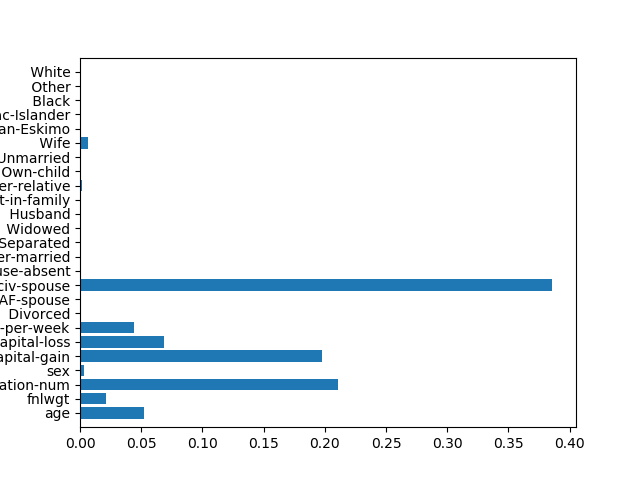

(-1, 25)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


info_gain = dtree.feature_importances_.tolist()
col_names = x_train_org.columns.values.tolist()

plt.barh(range(25),info_gain,align='center')
plt.yticks(np.arange(25),col_names)
plt.ylim(-1,25)

# where 25 is the number of columns in x_train_org
## you have to zoom in to see the numbers 

In [33]:
x_train_org

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Divorced,Married-AF-spouse,Married-civ-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
26464,59,61885,8,0,0,0,35,1,0,0,...,0,1,0,0,0,0,0,1,0,0
16134,71,180733,14,1,0,0,20,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4747,42,107762,14,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8369,26,35917,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5741,46,256522,2,0,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
24068,30,345705,10,0,0,0,40,0,0,1,...,0,1,0,0,0,0,0,0,0,1
20037,18,90934,10,0,0,0,28,0,0,0,...,0,0,1,0,0,0,0,0,0,1
30543,22,180060,9,0,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3633,76,316185,4,1,0,0,12,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11006,37,312766,9,1,0,0,40,1,0,0,...,1,0,0,0,0,0,0,0,0,1
